In [1]:

import pandas as pd
#get cds data
df = pd.read_stata('cds_spread5y_2001_2016.dta')

#separating the dates
df['Date'] = pd.to_datetime(df['mdate'])

#separating the months
df['Month'] = df['Date'].dt.month

#seperating the years
df['Year'] = df['Date'].dt.year


# Set a default value
df['Quarter'] = '4'
#Quarter if above 9 months will be at quarter 4
df['Quarter'][df['Month'] > 9] = '4'
#setting for quarter 3
df['Quarter'][(df['Month'] > 6) & (df['Month'] <= 9)] = '3'
#setting for quater 2
df['Quarter'][(df['Month'] > 3) & (df['Month'] <= 6)] = '2'
#setting for quater 1
df['Quarter'][df['Month'] <= 3] = '1'

#changing columns to float so that it can be connected to
df['gvkey'] = df['gvkey'].astype(float)

df['Quarter'] = df['Quarter'].astype(float)

df['Year'] = df['Year'].astype(float)


#get company data
Company = pd.read_csv("Quarterly Merged CRSP-Compustat.csv")

#changing columns to something similar
Company=Company.rename(columns = {'datadate':'mdate'})
Company=Company.rename(columns = {'GVKEY':'gvkey'})



#separating the dates
Company['Date'] = pd.to_datetime(Company['mdate'])

#separating the months
Company['Month'] = Company['Date'].dt.month

#seperating the years
Company['Year'] = Company['Date'].dt.year



# Making values to merge the dataframe
Company['Quarter'] = '4'
#Quarter if above 9 months will be at quarter 4
Company['Quarter'][Company['Month'] > 9] = '4'
#setting for quarter 3
Company['Quarter'][(Company['Month'] > 6) & (Company['Month'] <= 9)] = '3'
#setting for quater 2
Company['Quarter'][(Company['Month'] > 3) & (Company['Month'] <= 6)] = '2'
#setting for quater 1
Company['Quarter'][Company['Month'] <= 3] = '1'

#changing columns to float so that it can be connected to
Company['gvkey'] = Company['gvkey'].astype(float)

Company['Quarter'] = Company['Quarter'].astype(float)

Company['Year'] = Company['Year'].astype(float)



#merging the data 
Data_Take=pd.merge(Company, df, on=['gvkey', 'Quarter','Year'])


C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Administrator\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be s

In [2]:
#assignment 5

'''Filtering and splitting data'''
#keep numerical columns
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
Data_Take = Data_Take.select_dtypes(include=numerics)

#fill in for median
Data_Take=Data_Take.fillna(Data_Take.median())

#drop columns with na
Data_Take=Data_Take.dropna(axis=1, how='any')

#grab test data
Data_Test = Data_Take[(Data_Take['Year'] >= 2016) & (Data_Take['Year'] <= 2018)]

#splitting x and y for test data
X_test= Data_Test.drop('spread5y', axis=1)
y_test=Data_Test['spread5y']
#deleting unnecessary features
X_test= X_test.drop('Month_x', axis=1)
X_test= X_test.drop('Month_y', axis=1)
X_test= X_test.drop('Quarter', axis=1)
X_test= X_test.drop('Year', axis=1)
X_test= X_test.drop('gvkey', axis=1)

#training data
Data_Train=Data_Take[(Data_Take['Year'] < 2016)]

#splitting x and y for test data
X_train= Data_Train.drop('spread5y', axis=1)
y_train=Data_Train['spread5y']
X_train= X_train.drop('Month_x', axis=1)
X_train= X_train.drop('Month_y', axis=1)
X_train= X_train.drop('Quarter', axis=1)
X_train= X_train.drop('Year', axis=1)
X_train= X_train.drop('gvkey', axis=1)


In [3]:
'''RUNNING FIRST MODEL '''
## Import the random forest model.
from sklearn.ensemble import RandomForestRegressor 
## This line instantiates the model. 
rf = RandomForestRegressor(n_estimators=50) 
## Fit the model on your training data.
rf.fit(X_train, y_train) 
## And score it on your testing data.
rf.score(X_test, y_test)

rf_50=rf.predict(X_test)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [4]:
''' Filter Obtain only 50 top Important Feautres'''
#finding the importance
feature_importances=rf.feature_importances_

feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
top_50=feature_importances.iloc[:50,:]
top_50=top_50.index.tolist()

from sklearn.metrics import  mean_squared_error
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_squared_error(y_test,rf_50)
mean_absolute_percentage_error(y_test, rf_50)

#filtering only for the needed data
Filtered_X_train=X_train[top_50]
Filtered_X_test=X_test[top_50]


In [5]:

"""         RANDOM FOREST              """
#random forest regressor 100
rf_100 = RandomForestRegressor(n_estimators=100) 
rf_100.fit(Filtered_X_train, y_train)
rf_100_pred=rf_100.predict(Filtered_X_test)


mab_rf_100=mean_absolute_percentage_error(y_test, rf_100_pred)
mab_rf_100
mse_rf_100=mean_squared_error(y_test,rf_100_pred)
mse_rf_100


#random forest regressor 200
rf_200 = RandomForestRegressor(n_estimators=200) 
rf_200.fit(Filtered_X_train, y_train)
rf_200_pred=rf_200.predict(Filtered_X_test)


mab_rf_200=mean_absolute_percentage_error(y_test, rf_200_pred)
mab_rf_200
mse_rf_200=mean_squared_error(y_test,rf_200_pred)
mse_rf_200


#random forest regressor 500
rf_500 = RandomForestRegressor(n_estimators=500) 
rf_500.fit(Filtered_X_train, y_train)
rf_500_pred=rf_500.predict(Filtered_X_test)


mab_rf_500=mean_absolute_percentage_error(y_test, rf_500_pred)
mab_rf_500
mse_rf_500=mean_squared_error(y_test,rf_500_pred)
mse_rf_500

#random forest regressor 500
rf_1000 = RandomForestRegressor(n_estimators=1000) 
rf_1000.fit(Filtered_X_train, y_train)
rf_1000_pred=rf_1000.predict(Filtered_X_test)


mab_rf_1000=mean_absolute_percentage_error(y_test, rf_1000_pred)
mab_rf_1000
mse_rf_1000=mean_squared_error(y_test,rf_1000_pred)
mse_rf_1000


0.001304716251353163

In [8]:
"""         GRADIENT BOOSTING              """
from sklearn.ensemble import GradientBoostingRegressor 
#GRADIENT BOOSTING 100
gbr_100 = GradientBoostingRegressor(n_estimators=100) 
gbr_100.fit(Filtered_X_train, y_train)
gbr_100_pred=gbr_100.predict(Filtered_X_test)


mab_gbr_100=mean_absolute_percentage_error(y_test, gbr_100_pred)
mab_gbr_100
mse_gbr_100=mean_squared_error(y_test,gbr_100_pred)
mse_gbr_100

#GRADIENT BOOSTING 200
gbr_200 = GradientBoostingRegressor(n_estimators=200) 
gbr_200.fit(Filtered_X_train, y_train)
gbr_200_pred=gbr_200.predict(Filtered_X_test)


mab_gbr_200=mean_absolute_percentage_error(y_test, gbr_200_pred)
mab_gbr_200
mse_gbr_200=mean_squared_error(y_test,gbr_200_pred)
mse_gbr_200

#GRADIENT BOOSTING 500
gbr_500 = GradientBoostingRegressor(n_estimators=500) 
gbr_500.fit(Filtered_X_train, y_train)
gbr_500_pred=gbr_500.predict(Filtered_X_test)


mab_gbr_500=mean_absolute_percentage_error(y_test, gbr_500_pred)
mab_gbr_500
mse_gbr_500=mean_squared_error(y_test,gbr_500_pred)
mse_gbr_500


#GRADIENT BOOSTING 1000
gbr_1000 = GradientBoostingRegressor(n_estimators=1000) 
gbr_1000.fit(Filtered_X_train, y_train)
gbr_1000_pred=gbr_1000.predict(Filtered_X_test)


mab_gbr_1000=mean_absolute_percentage_error(y_test, gbr_1000_pred)
mab_gbr_1000
mse_gbr_1000=mean_squared_error(y_test,gbr_1000_pred)
mse_gbr_1000

0.001244415891357143

In [9]:
"""Xgboost Modeling """
import xgboost as xgb

xgb_100 = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 100)
xgb_200 = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 200)
xgb_500 = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 500)
xgb_1000 = xgb.XGBRegressor(objective ='reg:linear',n_estimators = 1000)

xgb_fit_100 = xgb_100.fit(Filtered_X_train, y_train)
xgb_fit_200 = xgb_200.fit(Filtered_X_train, y_train)
xgb_fit_500 = xgb_500.fit(Filtered_X_train, y_train)
xgb_fit_1000 = xgb_1000.fit(Filtered_X_train, y_train)

xgb100_pred = xgb_fit_100.predict(Filtered_X_test)  
xgb200_pred = xgb_fit_200.predict(Filtered_X_test)
xgb500_pred = xgb_fit_500.predict(Filtered_X_test)  
xgb1000_pred = xgb_fit_1000.predict(Filtered_X_test)

#absolute percentage error & mean squared error of predicition
mab_xgb_100=mean_absolute_percentage_error(y_test, xgb100_pred)
mab_xgb_100
mse_xgb_100=mean_squared_error(y_test,xgb100_pred)
mse_xgb_100

mab_xgb_200=mean_absolute_percentage_error(y_test, xgb200_pred)
mab_xgb_200
mse_xgb_200=mean_squared_error(y_test,xgb200_pred)
mse_xgb_200

mab_xgb_500=mean_absolute_percentage_error(y_test, xgb500_pred)
mab_xgb_500
mse_xgb_500=mean_squared_error(y_test,xgb500_pred)
mab_xgb_500

mab_xgb_1000=mean_absolute_percentage_error(y_test, xgb1000_pred)
mab_xgb_1000
mse_xgb_1000=mean_squared_error(y_test,xgb1000_pred)
mse_xgb_1000

0.0012676836036026665

In [10]:
#MSE Results and Plot
'''MSE & MAPE RandomForest'''
print('Mean Squared Error for RandomForest with 100 trees: ', mse_rf_100)
print('Mean Squared Error for RandomForest with 200 trees: ', mse_rf_200)
print('Mean Squared Error for RandomForest with 500 trees: ', mse_rf_500)
print('Mean Squared Error for RandomForest with 1000 trees: ', mse_rf_1000)

mse_rf_list=[]
mse_rf_list.append(mse_rf_100)
mse_rf_list.append(mse_rf_200)
mse_rf_list.append(mse_rf_500)
mse_rf_list.append(mse_rf_1000)

print('Mean Absolute Percentage for RandomForest with 100 trees: ', mab_rf_100)
print('Mean Absolute Percentage for RandomForest with 200 trees: ', mab_rf_200)
print('Mean Absolute Percentage for RandomForest with 500 trees: ', mab_rf_500)
print('Mean Absolute Percentage for RandomForest with 1000 trees: ', mab_rf_1000)

mab_rf_list=[]
mab_rf_list.append(mab_rf_100)
mab_rf_list.append(mab_rf_200)
mab_rf_list.append(mab_rf_500)
mab_rf_list.append(mab_rf_1000)

Mean Squared Error for RandomForest with 100 trees:  0.0014624109281006247
Mean Squared Error for RandomForest with 200 trees:  0.0012632642445989403
Mean Squared Error for RandomForest with 500 trees:  0.0012600538590495254
Mean Squared Error for RandomForest with 1000 trees:  0.001304716251353163
Mean Absolute Percentage for RandomForest with 100 trees:  42.61058667549039
Mean Absolute Percentage for RandomForest with 200 trees:  41.300394753453915
Mean Absolute Percentage for RandomForest with 500 trees:  40.988726760532536
Mean Absolute Percentage for RandomForest with 1000 trees:  41.48377674674561


In [11]:
'''MSE & MAPE Xgboost'''
print('Mean Squared Error for Xgboost with 100 trees: ', mse_xgb_100)
print('Mean Squared Error for Xgboost with 200 trees: ', mse_xgb_200)
print('Mean Squared Error for Xgboost with 500 trees: ', mse_xgb_500)
print('Mean Squared Error for Xgboost with 1000 trees: ', mse_xgb_1000)


mse_xgb_list=[]
mse_xgb_list.append(mse_xgb_100)
mse_xgb_list.append(mse_xgb_200)
mse_xgb_list.append(mse_xgb_500)
mse_xgb_list.append(mse_xgb_1000)

print('Mean Absolute Percentage for Xgboost with 100 trees: ', mab_xgb_100)
print('Mean Absolute Percentage for Xgboost with 200 trees: ', mab_xgb_200)
print('Mean Absolute Percentage for Xgboost with 500 trees: ', mab_xgb_500)
print('Mean Absolute Percentage for Xgboost with 1000 trees: ', mab_xgb_1000)


mab_xgb_list=[]
mab_xgb_list.append(mab_xgb_100)
mab_xgb_list.append(mab_xgb_200)
mab_xgb_list.append(mab_xgb_500)
mab_xgb_list.append(mab_xgb_1000)


Mean Squared Error for Xgboost with 100 trees:  0.0014226631888285526
Mean Squared Error for Xgboost with 200 trees:  0.0013391048727535576
Mean Squared Error for Xgboost with 500 trees:  0.0012879624905743595
Mean Squared Error for Xgboost with 1000 trees:  0.0012676836036026665
Mean Absolute Percentage for Xgboost with 100 trees:  81.55608738738482
Mean Absolute Percentage for Xgboost with 200 trees:  72.19241206241843
Mean Absolute Percentage for Xgboost with 500 trees:  61.35833801034186
Mean Absolute Percentage for Xgboost with 1000 trees:  56.76927270519631


In [14]:
'''MSE & MAPE GradientBoosting'''
mab_gbr_1000=mean_absolute_percentage_error(y_test, gbr_1000_pred)
mab_gbr_1000
mse_gbr_1000=mean_squared_error(y_test,gbr_1000_pred)
mse_gbr_1000

print('Mean Squared Error for GradientBoosting with 100 trees: ', mse_gbr_100)
print('Mean Squared Error for GradientBoosting with 200 trees: ', mse_gbr_200)
print('Mean Squared Error for GradientBoosting with 500 trees: ', mse_gbr_500)
print('Mean Squared Error for GradientBoosting with 1000 trees: ', mse_gbr_1000)

mse_gbr_list=[]
mse_gbr_list.append(mse_gbr_100)
mse_gbr_list.append(mse_gbr_200)
mse_gbr_list.append(mse_gbr_500)
mse_gbr_list.append(mse_gbr_1000)


print('Mean Absolute Percentage for GradientBoosting with 100 trees: ', mab_gbr_100)
print('Mean Absolute Percentage for GradientBoosting with 200 trees: ', mab_gbr_200)
print('Mean Absolute Percentage for GradientBoosting with 500 trees: ', mab_gbr_500)
print('Mean Absolute Percentage for GradientBoosting with 1000 trees: ', mab_gbr_1000)


mab_gbr_list=[]
mab_gbr_list.append(mab_gbr_100)
mab_gbr_list.append(mab_gbr_200)
mab_gbr_list.append(mab_gbr_500)
mab_gbr_list.append(mab_gbr_1000)

Mean Squared Error for GradientBoosting with 100 trees:  0.001400209509533599
Mean Squared Error for GradientBoosting with 200 trees:  0.0013030323244608245
Mean Squared Error for GradientBoosting with 500 trees:  0.001244415891357143
Mean Squared Error for GradientBoosting with 1000 trees:  0.001244415891357143
Mean Absolute Percentage for GradientBoosting with 100 trees:  80.91699851567076
Mean Absolute Percentage for GradientBoosting with 200 trees:  70.5087962183516
Mean Absolute Percentage for GradientBoosting with 500 trees:  60.932274491493374
Mean Absolute Percentage for GradientBoosting with 1000 trees:  58.057714540746105


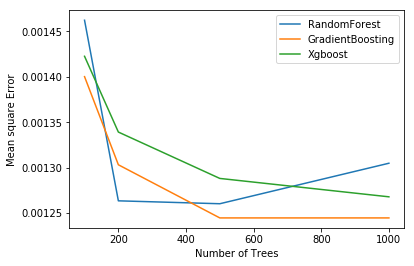

In [18]:
''' Ploting Mean Square Error'''
import pylab
tree=[100,200,500,1000]

pylab.plot(tree,mse_rf_list,label='RandomForest')
pylab.plot(tree,mse_gbr_list,label='GradientBoosting' )
pylab.plot(tree,mse_xgb_list,label='Xgboost')
pylab.legend(loc='upper right')
pylab.ylabel('Mean square Error')
pylab.xlabel('Number of Trees')
pylab.show()



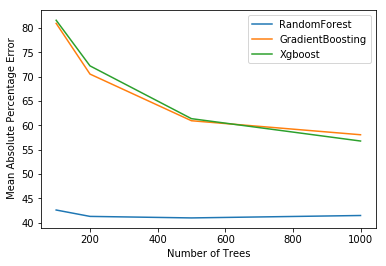

In [19]:
''' Ploting Mean Absolute Percentage Error'''
import pylab
tree=[100,200,500,1000]

pylab.plot(tree,mab_rf_list,label='RandomForest')
pylab.plot(tree,mab_gbr_list,label='GradientBoosting' )
pylab.plot(tree,mab_xgb_list,label='Xgboost')
pylab.legend(loc='upper right')
pylab.ylabel(' Mean Absolute Percentage Error')
pylab.xlabel('Number of Trees')
pylab.show()